<a href="https://colab.research.google.com/github/ipavlopoulos/modern_nlp/blob/main/ModernNLP_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ModernNLP: #1
* Talk about word usage change and this recent [Simple, Interpretable and Stable Method for Detecting Words with Usage Change across Corpora](https://www.aclweb.org/anthology/2020.acl-main.51.pdf).
* As background, read Mikolov's [ICLR](https://research.google/pubs/pub41224/) and [NIPS](https://papers.nips.cc/paper/2013/hash/9aa42b31882ec039965f3c4923ce901b-Abstract.html) papers, and alingment models such as [Procrustes](https://www.aclweb.org/anthology/K18-1021.pdf) and [Compass](https://arxiv.org/abs/1906.02376).
* Whoever interested take a look [subword embeddings](https://www.aclweb.org/anthology/P16-1162.pdf). 
* Import Gensim's Word2Vec.
```
John Pavlopoulos, Senior Lecturer (fixed-term) 
Stockholm University, Sweden
```




---



Load Word2Vec 

In [5]:
%%capture
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Import NLTK and download the Brown corpus. 

In [7]:
import nltk; nltk.download('brown')
from nltk.corpus import brown

print(brown.sents()[0])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


Build a vector space model.

In [20]:
# the embedding
space.wv["cool"]

array([ 4.69192415e-02,  3.84599835e-01, -1.17444091e-01,  3.90834779e-01,
       -1.74343064e-01, -1.46316802e-02, -1.44882098e-01, -1.53415769e-01,
        1.25329658e-01, -9.56843793e-02,  2.14113891e-01,  1.90838084e-01,
        9.64790657e-02,  6.41203746e-02,  3.20920855e-01,  2.35891804e-01,
       -1.29782259e-02, -1.53746381e-01,  3.48067433e-01,  1.30042687e-01,
        3.87522757e-01,  2.86956757e-01, -1.90682393e-02,  2.16638207e-01,
        5.02827913e-02, -2.63031125e-01,  1.69103637e-01,  3.15437287e-01,
        1.41841754e-01, -9.12493840e-02,  1.45683557e-01, -2.29295686e-01,
        1.23761512e-01, -2.32542604e-01, -1.84404477e-01, -1.19114019e-01,
        2.78509855e-01,  3.56924146e-01, -1.99878648e-01, -8.17644075e-02,
       -1.48084342e-01, -1.89105719e-01, -6.03681281e-02, -2.63012677e-01,
        2.27178290e-01, -3.16896409e-01, -2.89968222e-01, -2.03095600e-02,
       -1.02955811e-01, -1.53868094e-01, -2.43482083e-01,  8.94452408e-02,
        5.99595066e-03,  

In [17]:
# top-3 neighbors
space.wv.most_similar(positive=["nice"], topn=3)

[('lonely', 0.9283513426780701),
 ('happy', 0.9280937314033508),
 ('fine', 0.9277538657188416)]

### Experiment
* Try to build many (word embedding) spaces, 10 or 100.
* Compute the mean pairwise similarity for the same word.
* Take the same word and compute one embedding per space; then, how similar are the neighbours of that word across the different spaces? 

In [21]:
# the target word
target = "gay"

# the neighbors
k = 1000
neighbors = {}

# different spaces
for i in range(10):
  space = word2vec.Word2Vec(brown.sents(), seed=i)
  neighbors[i] = space.wv.most_similar(positive=[target], topn=k)

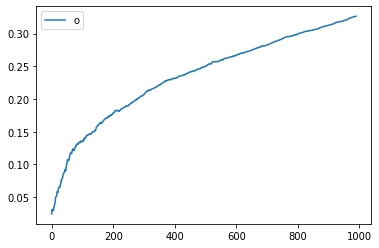

In [22]:
import numpy as np
import pandas as pd

def overlap(v1, v2):
  """Overlap between two (2D) lists"""
  assert len(v1) == len(v2)
  pool = set([j[0] for j in v2])
  return len([1 for i,j in zip(v1,v2) if i[0] in pool])/len(v1)

mean_overlaps = []
for n in range(10, 1000):
  overlaps = []
  for i in neighbors:
    for j in neighbors:
      if i<j: 
        # compare only the top n items in the lists
        overlaps.append(overlap(neighbors[i][:n], neighbors[j][:n]))
  mean_overlaps.append(np.mean(overlaps))

# Plot the mean relative overlap of a word with its self (self-similarity), 
# for a varying number of neighbors.
pd.DataFrame({"self similariry": mean_overlaps}).plot();

In [23]:
top10 = pd.DataFrame({i:[n[0] for n in neighbors[i][:10]] for i in neighbors})
top10.head()

,0,1,2,3,4,5,6,7,8,9
0,rich,witty,Mao,reactionary,lacking,saint,Bible,cancer,tone,inorganic
1,laissez-faire,Hearst,unhappy,surely,circus,Marx,rich,landscape,nominated,fragile
2,saint,absent,dull,spoken,evil,irony,mine,gaiety,confronted,Milton
3,fragile,awful,unfortunately,anxious,misleading,Karl,sharpened,author,engineer,Romans
4,grotesque,weak,complicated,Unfortunately,yours,awkward,scandals,interior,actuality,disgusted
